In [1]:
import pandas as pd

import numpy as np 

from itertools import combinations

import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.api as sm
import statsmodels.formula.api as smf

from fbprophet import Prophet
import pandahouse as ph

/opt/tljh/user/lib/python3.7/site-packages/ipykernel_launcher.py:5: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  """


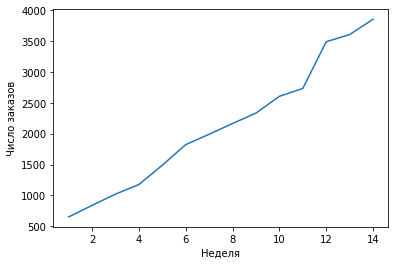

In [2]:
sales = pd.read_csv('https://stepik.org/media/attachments/lesson/426638/test2_completed.csv')

sales['Дата'] = pd.to_datetime(sales['Дата'])

sales['Неделя'] = sales['Дата'].dt.week

sns.lineplot(x='Неделя', y='Число заказов', data=sales)

C первого взгляда, кажется, что у заказов в магазине наблюдается сезонность, однако, мы предполагаем, что магазин недавно открыл услугу доставки товаров на дом. Также мы видим скачок в марте 2020 года, что наводит о мысли, что он произошёл благодаря объявленным карантинным мерам в городах России. <br>
Находясь в моменте, мы не знаем, как долго карантин может продолжаться. Исходя из этого определяется вес последних 3х недель. <br>
В случае продолжения карантина, им следует присвоить бОльший вес, в случае снятия ограничений - меньший. <br>
**Тем не менее, стоит отметить, что прогноз на 3 месяца вперёд, имея данные только за 3 месяца не может быть достаточно достоверным, так как нет возможности выявить сезонность.** <br>

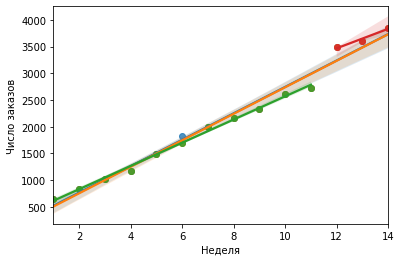

In [3]:
sns.regplot(x='Неделя', y='Число заказов', data = sales)

sales_2 = sales

sales_2.loc[5, 'Число заказов'] = sales_2.loc[5, 'Число заказов'] * 0.93 # мы убираем эффект от проведённой акции

sns.regplot(x='Неделя', y='Число заказов', data = sales_2)

sales_before = sales_2[:11]

sns.regplot(x='Неделя', y='Число заказов', data = sales_before)
sales_after = sales_2[11:]
sns.regplot(x='Неделя', y='Число заказов', data = sales_after)

In [4]:
sales_2.pop('Неделя')

sales_fb = sales_2.rename(columns={'Неделя': 'ds', 'Число заказов':'y'}) 

sales_fb['Дата'] = pd.to_datetime(sales_fb['Дата'])

sales_fb = sales_fb.rename(columns={'Дата': 'ds'})
# готовим данные для Prophet

В первом случае мы задаем параметры, полагая, что карантинные ограничения лишь временное явление, и последние данных не столь важны для нашего прогноза

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 0.


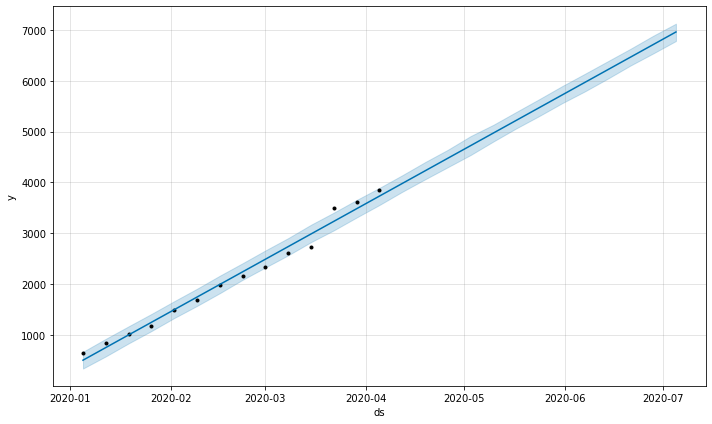

In [5]:
prophet = Prophet(changepoint_prior_scale=0.05, changepoint_range=0.1)
prophet.fit(sales_fb)
future = prophet.make_future_dataframe(periods=13, freq='W')
forecast = prophet.predict(future)
fig = prophet.plot(forecast)

In [6]:
sales_mean = forecast[['ds','yhat', 'yhat_lower', 'yhat_upper']]

answer_2_mean = sales_mean.rename(columns={'yhat':'Предсказанное значение',
                                           'yhat_lower':'Нижняя граница',
                                           'yhat_upper':'Верхняя граница', 
                                           'ds':'Дата'})

answer_2_mean = answer_2_mean[['Дата','Предсказанное значение','Нижняя граница','Верхняя граница']]\
                            .loc[14:].reset_index(drop=True)
answer_2_mean

,Дата,Предсказанное значение,Нижняя граница,Верхняя граница
0,2020-04-12,3981.001336,3817.075371,4142.667096
1,2020-04-19,4229.359873,4061.858745,4401.042052
2,2020-04-26,4477.718410,4301.542182,4644.245375
3,2020-05-03,4726.076947,4541.267974,4913.783844
4,2020-05-10,4974.435484,4807.593720,5136.208286
5,2020-05-17,5222.794021,5064.760194,5388.275162
6,2020-05-24,5471.152557,5306.052113,5638.166230
7,2020-05-31,5719.511094,5557.539270,5893.613447
8,2020-06-07,5967.869631,5790.466057,6136.617897
9,2020-06-14,6216.228168,6039.709301,6382.815174


В следующем прогнозе мы устанавливаем неделю в середине марта как переломную точку, считая, что ввод карантинных мер может изменить тренд. Также мы устанавливаем гибкость предсказания на более высоком уровне, так как не можем еще установить, насколько сильно могут повляить ограничения на продажи. 

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


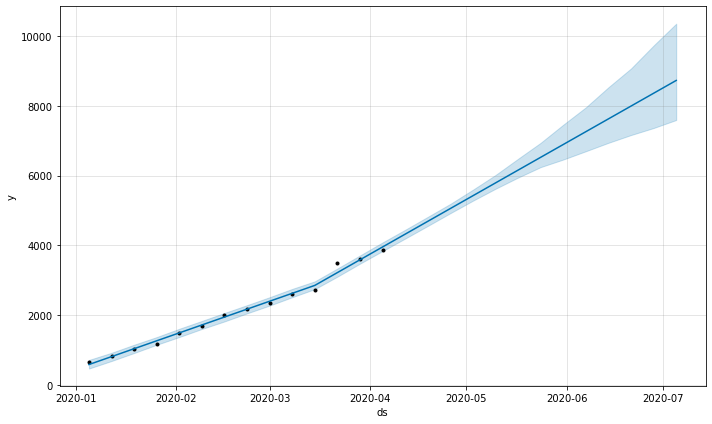

In [8]:
prophet_max = Prophet(changepoint_prior_scale=1, changepoints=['2020-03-15'])
prophet_max.fit(sales_fb)
future_max = prophet_max.make_future_dataframe(periods=13, freq='W')
forecast_max = prophet_max.predict(future_max)
fig_max = prophet_max.plot(forecast_max)

In [9]:
sales_max = forecast_max[['ds','yhat', 'yhat_lower', 'yhat_upper']]

answer_2_max = sales_max.rename(columns={'yhat':'Предсказанное значение',
                                         'yhat_lower':'Нижняя граница',
                                         'yhat_upper':'Верхняя граница', 
                                         'ds':'Дата'})

answer_2_max = answer_2_max[['Дата', 'Предсказанное значение','Нижняя граница','Верхняя граница']]\
                            .loc[14:].reset_index(drop=True)

answer_2_max

,Дата,Предсказанное значение,Нижняя граница,Верхняя граница
0,2020-04-12,4320.202799,4193.680169,4445.650255
1,2020-04-19,4687.272494,4555.054609,4816.062750
2,2020-04-26,5054.342189,4920.895134,5188.261845
3,2020-05-03,5421.411885,5278.550275,5594.311275
4,2020-05-10,5788.481580,5620.280873,6015.692782
5,2020-05-17,6155.551276,5941.788533,6480.914345
6,2020-05-24,6522.620971,6241.145983,6938.654939
7,2020-05-31,6889.690666,6458.418081,7457.400596
8,2020-06-07,7256.760362,6696.222172,7955.019334
9,2020-06-14,7623.830057,6937.361199,8530.300571
